<a href="https://colab.research.google.com/github/kiyong21c/Must_Have_pytorch_DL/blob/main/20220901_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN을 만들어 사물 이미지를 분류하는 모델 만들기
 - 데이터셋 : CIFAR-10(10가지 클래스를 갖음)
 - 동물, 비행기, 트럭, 자동차 등의 이미지

In [3]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

# CIFAR-10 데이터셋 불러오기
training_data = CIFAR10(root='./', train=True, download=True, transform=ToTensor())
test_data = CIFAR10(root='./', train=False, download=True, transform=ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [4]:
training_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
training_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
type(training_data.data) # numpy 배열이네?

numpy.ndarray

In [7]:
training_data.data.shape # (N, H, W, C) : 50000개 이미지, 32X32 크기, RGB

(50000, 32, 32, 3)

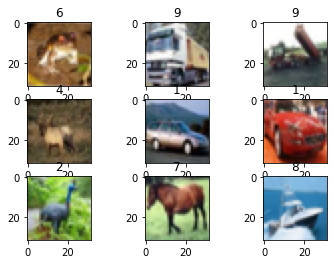

In [8]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i]);
    plt.title(training_data.targets[i])

### 데이터 증강
 - 데이터가 부족하거나, 오버피팅을 피하는 기법
 - 이미지 크기는 변화시키지 않는다
 - 이미지 일부분을 제거하고 싶다면, 크기를 줄이지 않기위해 제거 영역을 0으로 채운다

In [9]:
import shutil
# shutil.rmtree('/content/cifar-10-python.tar.gz') # 폴더 삭제

import os
os.remove('/content/cifar-10-python.tar.gz') # 파일 삭제

Files already downloaded and verified
Files already downloaded and verified
(50000, 32, 32, 3)


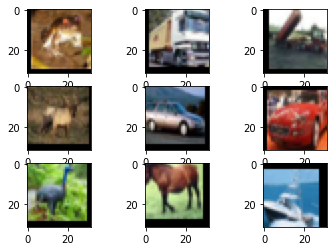

In [10]:
# 데이터 전처리 : 크롭핑과 좌우대칭
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([T.ToPILImage(), # (C x H x W)  →  (H x W x C)
                      RandomCrop((32, 32), padding=4), # (32, 32) : 최종출력크기, padding=4 만큼 임의로 크롭핑
                      RandomHorizontalFlip(p=0.5)])    # 50% 확률로 y축 대칭

training_data = CIFAR10(root='./', train=True, download=True, transform=None)
test_data = CIFAR10(root='./', train=False, download=True, transform=None)

print(training_data.data.shape)

for i in range(9):
    plt.subplot(3, 3, i+1)
    # plt.imshow(training_data.data[i]) # transforms가 적용되어 있지 않다 
    plt.imshow(transforms(training_data.data[i])) # 비로소 transforms가 적용됨

### 이미지 정규화
 - 적(R), 녹(G), 청(B)의 데이터의 분포가 치우쳐져 있으면 학습에 안좋은 영향
 - 정규분포(가우스분포)를 따르도록 정규화

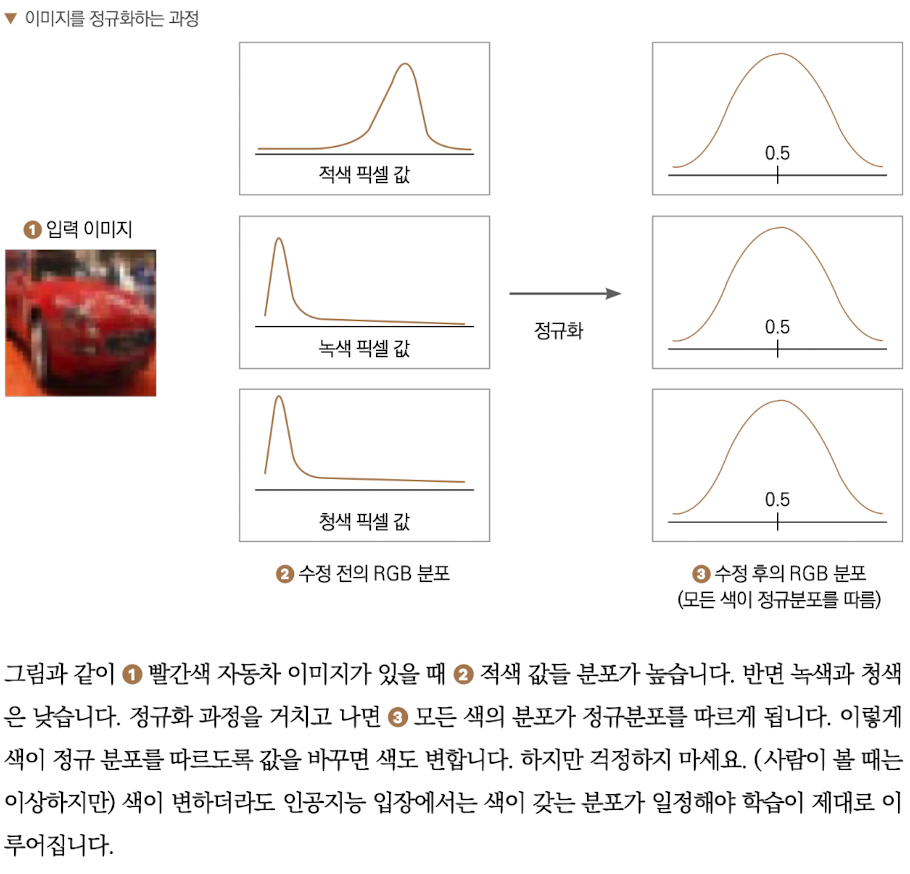

Files already downloaded and verified
Files already downloaded and verified


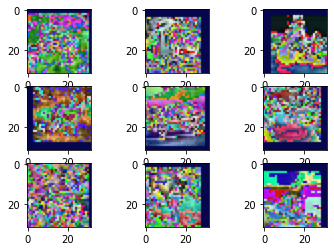

In [11]:
# 데이터 전처리 : 정규화 추가
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

# 데이터 전처리 정의
transforms = Compose([
                      T.ToPILImage(),
                      RandomCrop((32,32), padding=4),
                      RandomHorizontalFlip(p=0.5),
                      T.ToTensor(), # (3, 32, 32) : Cannel, Height, Width
                      Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)), # 텐서타입에서 연산가능
                      T.ToPILImage() # (3, 32, 32) → (32, 32, 3) : Height, Width, Channel
                      ])

training_data = CIFAR10(root='./', train=True, download=True, transform=transforms) # transform을 적용하지 않으면, CIFAR10원본은 PIL.Image 형식
test_data = CIFAR10(root='./', train=False, download=True, transform=transforms)

# 이미지 표시
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(transforms(training_data.data[i])) # training_data.data[i] : numpy.ndarray 형식
    # traininig_data는 transforms적용되어 PIL이미지 형식이 맞으나, traning_data.data는 ndarray이므로 transforms를 다시 적용하여 imshow(PIL이미지형식) 으로 만듬

Files already downloaded and verified
Files already downloaded and verified


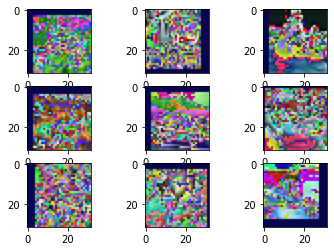

In [12]:
transforms = Compose([
                    #   T.ToPILImage() : 이때는 왜 쓰면 안되는가?
                      RandomCrop((32,32), padding=4),
                      RandomHorizontalFlip(p=0.5),
                      T.ToTensor(), # (3, 32, 32) : Cannel, Height, Width
                      Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)), # 텐서타입에서 연산가능
                      T.ToPILImage() # (3, 32, 32) → (32, 32, 3) : Height, Width, Channel
                      ])

training_data = CIFAR10(root='./', train=True, download=True, transform=transforms) # transform을 적용하지 않으면, CIFAR10원본은 PIL.Image 형식
test_data = CIFAR10(root='./', train=False, download=True, transform=transforms)



for i, (image, target) in enumerate(training_data):
    plt.subplot(3,3,i+1)
    plt.imshow(image) # 
    if i == 8:
        break

 - 리스트와 텐서의 차이

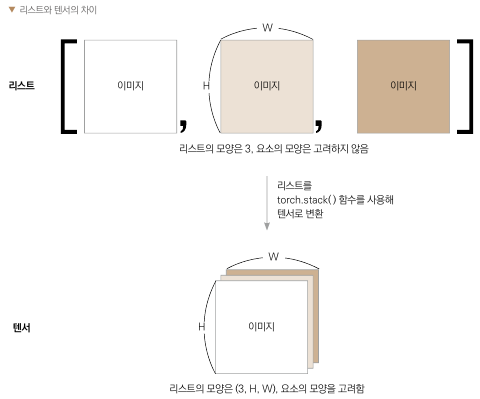

 - 간단한 신경망은 nn.Sequential
 - 복잡한 신경망은 nn.Module
 - 두가지는 사실상 같으나, 관리방법이 조금 다름

 - nn.Sequential
  
  > 층을 쌓기만 하는 간단한 구조에서 편리

  > 데이터 흐름이 한방향(입력층->출력층)인 경우 사용

  > 은닉층에서 순전파 도중의 결과 저장 불가(데이터 흐름을 제어하는 커스터마이징 불가)

 - nn.Module
 
  > 원하는 대로 신경망 동작 정의

In [13]:
# VGG 기본 블록 정의
import torch
import torch.nn as nn

class BasicBlock(nn.Module):

    # 기본 블록 층 정의
    def __init__(self, in_channels, out_channels, hidden_dim):
        super().__init__() # nn.Module 클래스의 속성과 메서드를 모두 불러옴

        self.conv1 = nn.Conv2d(in_channels, hidden_dim, kernel_size=3, padding=1)
        
        self.conv2 = nn.Conv2d(hidden_dim, out_channels, kernel_size=3, padding=1)

        self.relu = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    # 기본 블록 순전파 정의
    def forward(self, x):
        x = self.conv1(x) # 해당 층에 값을 통과시킨다
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        return x

### 전체 CNN 모델 정의하기
 - 입력값 → 합성곱 기본 블록 X 3 → 평탄화 → MLP 층(입력층-은닉층-출력층) → 출력값

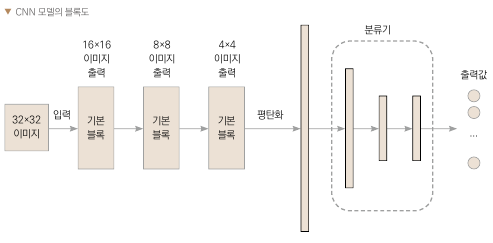

In [14]:
class CNN(nn.Module):
    def __init__(self, num_classes): # 클래스 개수를 파라미터로 받음
        super().__init__()

        # 합성곱 기본 블록 정의
        self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim=16) # 하나의 VGG 기본 블럭 : BasicBlock클래스도 nn.Module을 상속받아 만든 하나의 모델
        # (3,32,32) →conv1 → (16,32,32) → conv2 → (32,32,32) → pool → (32,16,16)
        self.block2 = BasicBlock(in_channels=32, out_channels=128, hidden_dim=64)
        # (32,16,16) →conv1 → (64,16,16) → conv2 → (128,16,16) → pool → (128,8,8)
        self.block3 = BasicBlock(in_channels=128, out_channels=256, hidden_dim=128)
        # (128,8,8) →conv1 → (128,8,8) → conv2 → (256,8,8) → pool → (256,4,4)

        # 분류기 정의
        self.fc1 = nn.Linear(in_features=4096, out_features=2048)
        self.fc2 = nn.Linear(in_features=2048, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=num_classes)

        # 분류기 내부 활성화 함수
        self.relu = nn.ReLU()

    def forward(self, x):
        # 합성곱 기본 블록 통과
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        # 평탄화
        x = torch.flatten(x, start_dim=1) # start_dim : 1부터 시작
        # x = x.view(x.size(0), -1) # out.size(0) : 0번째 차원인 배치차원을 그대로 두기위함(x.shape[0]과 같음)
        # x = x.reshape(x.shape[0], -1) # view, reshape 모두 사용 가능
        # 분류기 통과
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x    # layer를 정의하는 def __init__에는 return 값이 없음

### 모델 학습하기

In [15]:
# 데이터 증강 정의

from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam
from torchvision.transforms import Compose

transforms = Compose([
                      RandomCrop((32,32), padding=4), # 원래이미지 크기 32X32, padding 크기만큼 crop
                      RandomHorizontalFlip(p=0.5),
                      ToTensor(), # 이미지 정규화를 위해 img/ndaray → tensor
                      Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
                      ]) 


In [16]:
# 데이터 로드 및 모델 정의

# 학습용 데이터와 평가용 데이터 불러오기
training_data = CIFAR10(root='./', train=True, download=True, transform=transforms)
test_data = CIFAR10(root='./', train=False, download=True, transform=transforms)
# 데이터로더 정의
train_loader = DataLoader(training_data, batch_size=256, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256, shuffle=False)
# 학습을 진행할 프로세서 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# CNN 모델 객체 생성
model = CNN(num_classes=10) # 앞서 정의한 CNN클래스의 객체 생성
# 모델을 device로 보냄
model.to(device) # CNN모델 정의 할때 상속받은 nn.Module에 있는 메소드 to()
# 모델에 입력될 data(데이터로더를 통해 배치단위로 가져온)도 model의 device와 일치해야 함
# model을 통해 나온 예측값(preds)과의 손실 계산을 위해 실제값(label)도 device를 일치시켜야 함

Files already downloaded and verified
Files already downloaded and verified


CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

In [17]:
# 모델 학습하기(훈련데이터셋으로 최적의 가중치를 갖는 모델 만들기)

# 학습률 정의
lr = 1e-2
# 최적화 기법 정의
optim = Adam(model.parameters(), lr=lr)
# 학습 루프 정의
for epoch in range(10):
    for data, label in train_loader:
        data = data.to(device) # 모델에 들어갈 데이터도 device로 보냄
        label = label.to(device) # 모델을 통해 예측된 값과의 계산을 위해 실제값(label)도 device로 보냄
        
        optim.zero_grad() # 기울기 초기화
        preds = model(data) # 모델을 통한 예측
        # 오차역전파의 최적화
        criterion = nn.CrossEntropyLoss() # 손실함수 객체 생성
        loss = criterion(preds, label) # 손실 계산
        loss.backward() # 손실 역전파(미분 계산/저장)
        optim.step() # 가중치(model.parameters())를 업데이트 

    # if epoch%1 == 0:
    print(f'epoch{epoch+1} loss:{round(loss.item(), 4)}')

torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/CIFAR.pth') # 드라이브에 모델 파라미터(딕셔너리형태) 저장

epoch1 loss:1.7574
epoch2 loss:1.6291
epoch3 loss:1.6511
epoch4 loss:1.7248
epoch5 loss:1.6219
epoch6 loss:1.5095
epoch7 loss:1.3592
epoch8 loss:1.6465
epoch9 loss:1.6307
epoch10 loss:1.5355


### 모델 성능 평가하기

In [22]:
model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/CIFAR.pth', map_location=device))

num_corr = 0

with torch.no_grad():
    for data, label in test_loader:
        data = data.to(device)
        label = label.to(device)

        preds = model(data) # torch.size([])
        preds = preds.max(1)[1] # 배치내 각 행에서 가장 큰값(softmax처리 되지 않음)의 인덱스
        corr = preds.eq(label).sum().item()
        num_corr += corr
    
    print(f"Accuracy:{num_corr/len(test_data)}") # len(test_loader)가 아닌 len(test_data)


Accuracy:0.4737


## 전이 학습 모델 VGG로 분류하기

 - ImageNet은 1천 개의 사물에 대한 특징을 추출하도록 학습되어 있음(클래스가 1000개)
 - ImageNet 데이터셋으로 사전 학습된 VGG16 모델(파이토치 제공)
 - VGG16모델을 전이 학습에 CIFAR-10 데이터셋을 학습해 보자

### 사전 학습된 모델 불러오기
 - 파이토치가 제공하는 VGG-16모델
 - 마지막 분류기층(Fully Connected Layer) 수정
 - VGG-16모델 전체가 아닌 가중치만 내려받을 수 있음

In [30]:
import torch
import torch.nn as nn 
from torchvision.models.vgg import vgg16

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = vgg16(pretrained=True)
# 수정할 분류기 층 정의
fc = nn.Sequential(nn.Linear(512 * 7 * 7, 4096),
                   nn.ReLU(),
                   nn.Dropout(), # 50%(기본확률)로 가중치 삭제
                   nn.Linear(4096, 4096),
                   nn.ReLU(),
                   nn.Dropout(),
                   nn.Linear(4096, 10),
                   )

model.classifier = fc # 본래 분류기를 새로 정의한 분류기로 덮어씀
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

 - model.classfier로 모델 본래의 분류기 확인

```
from torchvision.models.vgg import vgg16
model = vgg16(pretrained=True)
model.classifier


> Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
```



### 모델 학습하기
 - 이미 1000개의 데이터의 특징을 (합성곱을 통해)추출하도록 학습된 모델(VGG-16)
 - 마지막 분류기만 1000개가 아닌, 10개의 클래스로 구분하도록 수정
 - ImageNet으로 학습되어, 가중치가 잘 만들어져 있는 모델이지만(가중치의 개수도 훨씬 많음)
 - 가지고 있는 훈련 데이터셋으로 다시 (전이)학습하여 가중치를 수정

In [31]:
# 훈련세트로 모델 학습하지 않고, VGG-16모델(분류기만 10개의 클래스로 구분하도록 수정)그대로를 성능평가해 보자
# VGG-16모델은 ImageNet으로 학습되어 가중치를 이미 갖고 있지만, 내가가진 훈련세트로 재 훈련 하지 않으면 성능이 나오지 않음
num_corr = 0

with torch.no_grad():
    for data, label in test_loader:
        data = data.to(device)
        label = label.to(device)

        preds = model(data) # torch.size([])
        preds = preds.max(1)[1] # 배치내 각 행에서 가장 큰값(softmax처리 되지 않음)의 인덱스
        corr = preds.eq(label).sum().item()
        num_corr += corr
    
    print(f"Accuracy:{num_corr/len(test_data)}") # len(test_loader)가 아닌 len(test_data)


Accuracy:0.1072


In [33]:
# 데이터 증강 정의

from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam
from torchvision.transforms import Compose

transforms = Compose([
                      RandomCrop((32,32), padding=4), # 원래이미지 크기 32X32, padding 크기만큼 crop
                      RandomHorizontalFlip(p=0.5),
                      ToTensor(), # 이미지 정규화를 위해 img/ndaray → tensor
                      Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
                      ]) 

In [34]:
# 데이터 로드 및 모델 정의

# 학습용 데이터와 평가용 데이터 불러오기
training_data = CIFAR10(root='./', train=True, download=True, transform=transforms)
test_data = CIFAR10(root='./', train=False, download=True, transform=transforms)
# 데이터로더 정의
train_loader = DataLoader(training_data, batch_size=256, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
# (전이)학습하기(훈련데이터셋으로 최적의 가중치를 갖는 모델 만들기)

from tqdm import tqdm

# 학습률 정의
lr = 1e-2
# 최적화 기법 정의
optim = Adam(model.parameters(), lr=lr)
# 학습 루프 정의
for epoch in range(10):
    for data, label in tqdm(train_loader):
        data = data.to(device) # 모델에 들어갈 데이터도 device로 보냄
        label = label.to(device) # 모델을 통해 예측된 값과의 계산을 위해 실제값(label)도 device로 보냄
        
        optim.zero_grad() # 기울기 초기화
        preds = model(data) # 모델을 통한 예측
        # 오차역전파의 최적화
        criterion = nn.CrossEntropyLoss() # 손실함수 객체 생성
        loss = criterion(preds, label) # 손실 계산
        loss.backward() # 손실 역전파(미분 계산/저장)
        optim.step() # 가중치(model.parameters())를 업데이트 

    # if epoch%1 == 0:
    print(f'epoch{epoch+1} loss:{round(loss.item(), 4)}')

torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/CIFAR_pretrained.pth') # 드라이브에 모델 파라미터(딕셔너리형태) 저장

100%|██████████| 196/196 [00:36<00:00,  5.32it/s]


epoch1 loss:2.3016


100%|██████████| 196/196 [00:39<00:00,  4.94it/s]


epoch2 loss:2.3039


100%|██████████| 196/196 [00:37<00:00,  5.24it/s]


epoch3 loss:2.304


100%|██████████| 196/196 [00:36<00:00,  5.37it/s]


epoch4 loss:2.304


100%|██████████| 196/196 [00:36<00:00,  5.39it/s]


epoch5 loss:2.2994


100%|██████████| 196/196 [00:36<00:00,  5.33it/s]


epoch6 loss:2.3049


100%|██████████| 196/196 [00:36<00:00,  5.42it/s]


epoch7 loss:2.302


100%|██████████| 196/196 [00:36<00:00,  5.40it/s]


epoch8 loss:2.3083


100%|██████████| 196/196 [00:35<00:00,  5.45it/s]


epoch9 loss:2.3029


100%|██████████| 196/196 [00:36<00:00,  5.44it/s]


epoch10 loss:2.3017


### 모델 성능 평가하기

In [36]:
model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/CIFAR_pretrained.pth', map_location=device))

num_corr = 0

with torch.no_grad():
    for data, label in test_loader:
        data = data.to(device)
        label = label.to(device)

        preds = model(data) # torch.size([])
        preds = preds.max(1)[1] # 배치내 각 행에서 가장 큰값(softmax처리 되지 않음)의 인덱스
        corr = preds.eq(label).sum().item()
        num_corr += corr
    
    print(f"Accuracy:{num_corr/len(test_data)}") # len(test_loader)가 아닌 len(test_data)


Accuracy:0.1
